In [1]:
import pandas as pd
import numpy as np

In [2]:
f1 = pd.read_csv("/Users/mine/Desktop/DATASET/train.csv")
f2 = pd.read_csv("/Users/mine/Desktop/DATASET/test.csv")

In [3]:
f1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
f1.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [27]:
f1.apply(lambda x: len(x.unique()))

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas.util.testing as tm

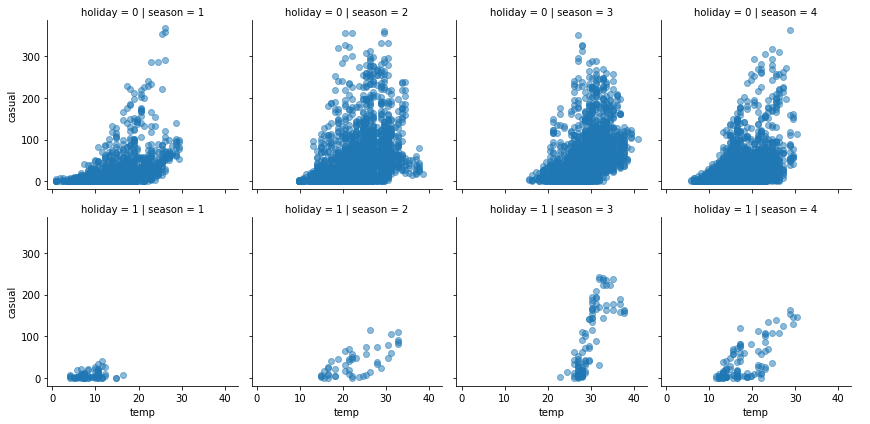

In [12]:
grid = sns.FacetGrid(f1, col = 'season', row = 'holiday')
grid.map(plt.scatter, 'temp', 'casual', alpha = 0.5)
grid.add_legend();

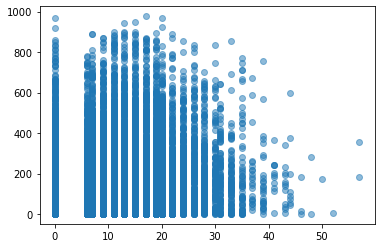

In [16]:
plt.scatter(x = f1['windspeed'], y = f1['count'], alpha= .5)
plt.show()

In [17]:
f1[['count', 'workingday']].groupby(['workingday'], as_index = False).mean().sort_values(by = 'count')

,workingday,count
0,0,188.506621
1,1,193.011873


In [20]:
f1[['count', 'holiday']].groupby(['holiday'], as_index = False).mean().sort_values(by = 'count')

,holiday,count
1,1,185.877814
0,0,191.741655


In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import model_selection, preprocessing

In [22]:
f1.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
f1.datetime = pd.to_datetime(f1.datetime) #to change the datatype, string to datetime
f1.datetime = pd.to_datetime(f1.datetime)

f1['year'] = f1['datetime'].dt.year
f1['month'] = f1['datetime'].dt.month
f1['day'] = f1['datetime'].dt.day
f1['hour'] = f1['datetime'].dt.hour

In [37]:
f1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  month       10886 non-null  int64  
 12  hour        10886 non-null  int64  
 13  day         10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


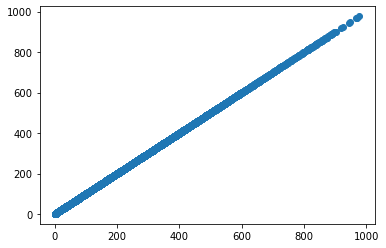

In [38]:
plt.scatter(x = f1['casual'] + f1['registered'], y = f1['count'])
plt.show()

In [39]:
X = np.array(f1.drop(f1[['casual', 'registered', 'count']], 1))
y = np.array(f1['count'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

In [40]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [46]:
clf = LinearRegression(normalize= True)
clf.fit(X_train, y_train)
print("The accuracy of linear regression is: ", clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))

The accuracy of linear regression is:  0.3061682285464472 
The RMSLE is:  1.3214038507848167


<ipython-input-40-6ce1387aca67>:3: RuntimeWarning: invalid value encountered in log
  log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))


In [44]:
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)
print("The accuracy of Decision Tree Regressor is: ", clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))

The accuracy of Decision Tree Regressor is:  0.7408878688203638 
The RMSLE is:  0.5659898731050367


In [45]:
clf = RandomForestRegressor(n_estimators= 200)
clf.fit(X_train, y_train)
print('The accuracy of Random Forest Regressor is: ', clf.score(X_test, y_test), "\nThe RMSLE is: ", rmsle(y_test, clf.predict(X_test)))



The accuracy of Random Forest Regressor is:  0.8728626297446007 
The RMSLE is:  0.4163608693535504
